# MBTI Analyse
![](https://149695645.v2.pressablecdn.com/wp-content/uploads/2021/06/16types-personnalite%CC%81s-mbti.png)

# There're 16 types of personality according to the MBTI test
![](https://blog.trginternational.com/hs-fs/hubfs/images/MyersBriggsTypes.png?width=711&name=MyersBriggsTypes.png)


The 16 personality types of the Myers-Briggs Type Indicator arise from four dimensions that consist of two categories each. Those dimensions are: Extraversion (E) versus Introversion (I), Sensing (S) versus Intuition (N), Thinking (T) versus Feeling (F), and Judging (J) versus Perceiving (P)

![](https://qph.fs.quoracdn.net/main-qimg-a318ca07746194003eecc36db974778d)

In [1]:
#library importing 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import re
import plotly.express as px

In [2]:
train=pd.read_csv('../input/mbti-type/mbti_1.csv')
train

type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]

In [3]:
px.pie(train,names='type',title='Personality type',hole=0.3)

<AxesSubplot:xlabel='type', ylabel='count'>

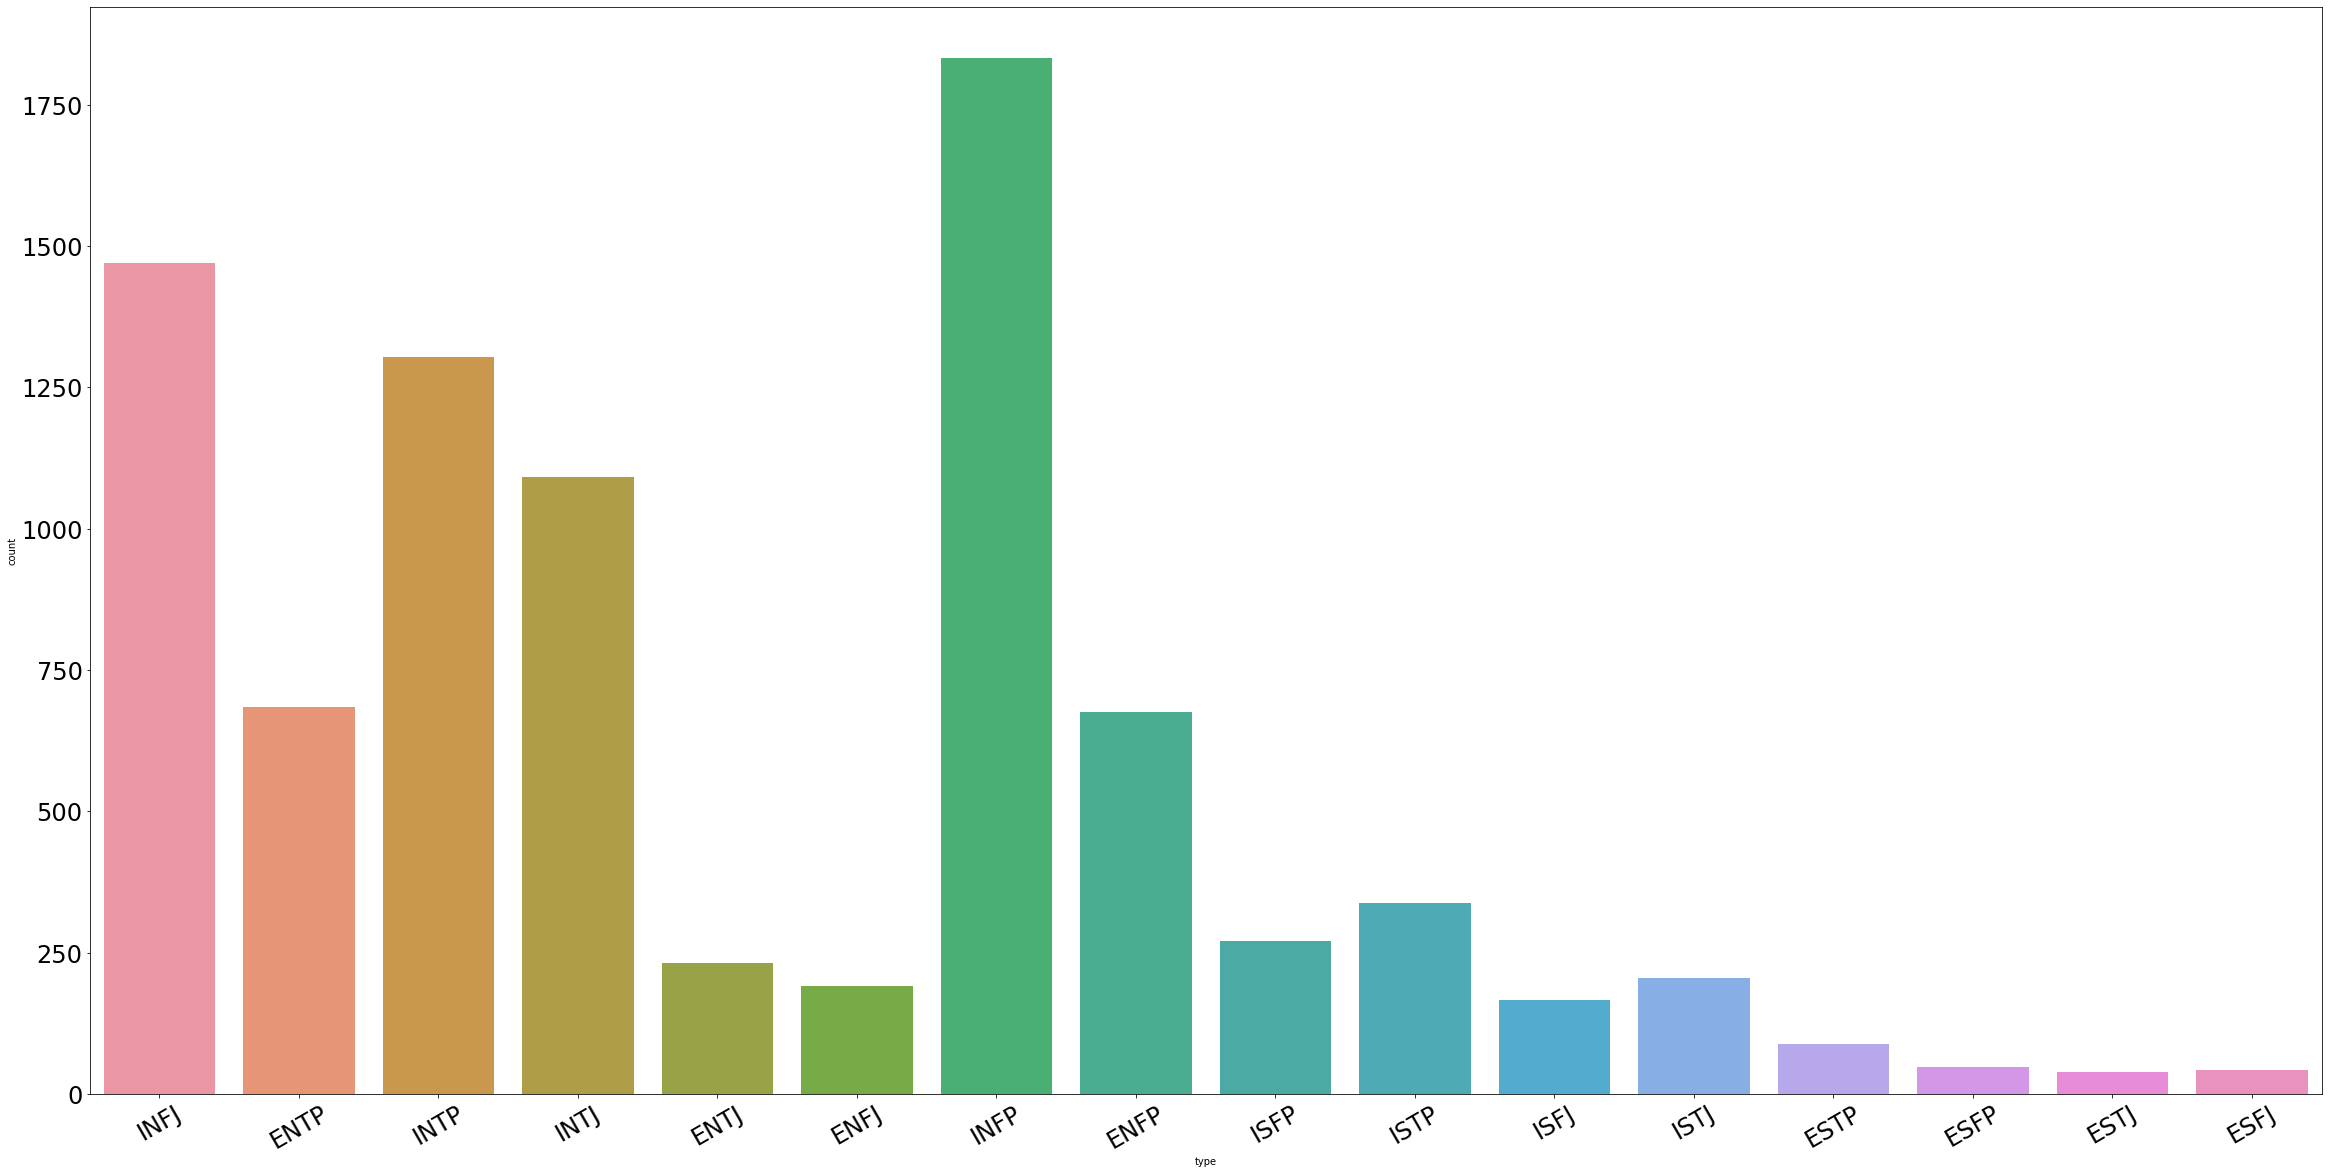

In [4]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize=24, rotation=30)
plt.yticks(fontsize=24, rotation=0)
sns.countplot(data=train, x='type')

In [5]:
#Adding more features
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

train['words_per_comment'] = train['posts'].apply(lambda x: len(x.split())/50)
train['variance_of_word_counts'] = train['posts'].apply(lambda x: var_row(x))
train.head()

type                                              posts  words_per_comment  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12   
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40   
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28   
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34   

   variance_of_word_counts  
0                 135.2900  
1                 187.4756  
2                 180.6900  
3                 181.8324  
4                 196.4576

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

54.0% of the points cannot be placed; you may w

<AxesSubplot:xlabel='type', ylabel='words_per_comment'>

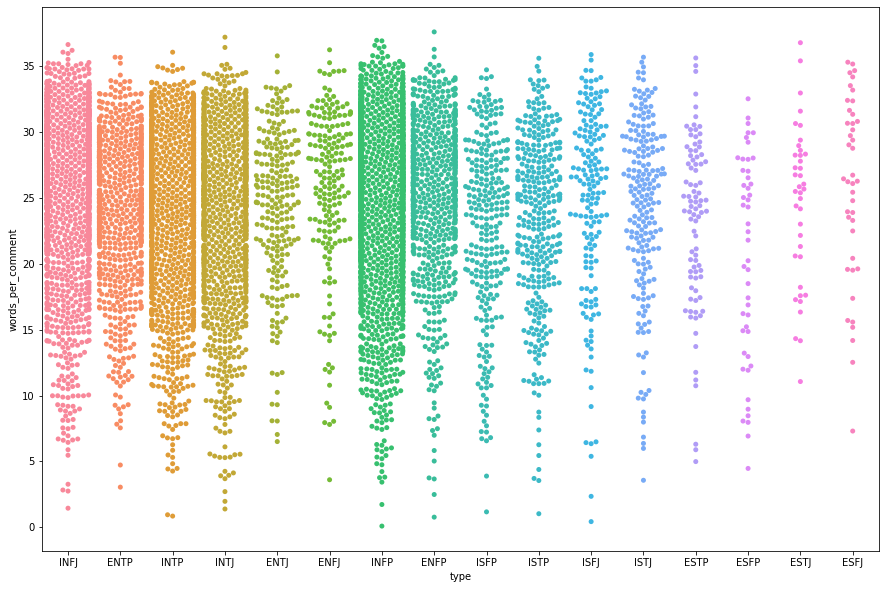

In [6]:
plt.figure(figsize=(15,10))
sns.swarmplot("type", "words_per_comment", data=train)

In [7]:
train1 =train[~train['type'].isin(['ESFJ','ESFP','ESTJ','ESTP'])]
train1['http_per_comment'] =train1['posts'].apply(lambda x: x.count('http')/50)
train1['qm_per_comment'] =train1['posts'].apply(lambda x: x.count('?')/50)
train1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



type                                              posts  words_per_comment  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12   
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40   
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28   
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34   

   variance_of_word_counts  http_per_comment  qm_per_comment  
0                 135.2900              0.48            0.36  
1                 187.4756              0.20            0.10  
2                 180.6900              0.10            0.24  
3                 181.8324              0.04            0.22  
4                 196.4576              0.12            0.20

In [8]:
print(train1.groupby('type').agg({'http_per_comment': 'mean'}))
print(train1.groupby('type').agg({'qm_per_comment': 'mean'}))

      http_per_comment
type                  
ENFJ          0.053263
ENFP          0.050459
ENTJ          0.053160
ENTP          0.048263
INFJ          0.065878
INFP          0.075426
INTJ          0.063593
INTP          0.070767
ISFJ          0.070602
ISFP          0.088339
ISTJ          0.061171
ISTP          0.081009
      qm_per_comment
type                
ENFJ        0.213053
ENFP        0.227259
ENTJ        0.240000
ENTP        0.220964
INFJ        0.208966
INFP        0.202533
INTJ        0.214849
INTP        0.221580
ISFJ        0.200964
ISFP        0.216384
ISTJ        0.214927
ISTP        0.221602


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 1080x720 with 0 Axes>

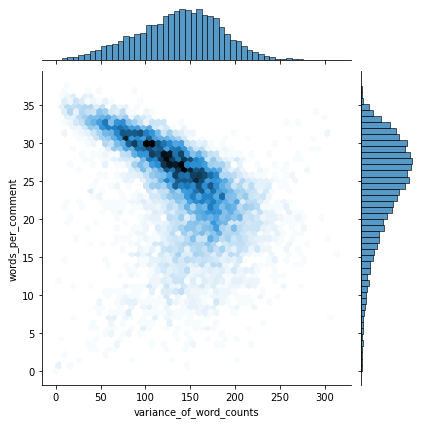

In [9]:
plt.figure(figsize=(15,10))
sns.jointplot("variance_of_word_counts", "words_per_comment", data=train1, kind="hex")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning

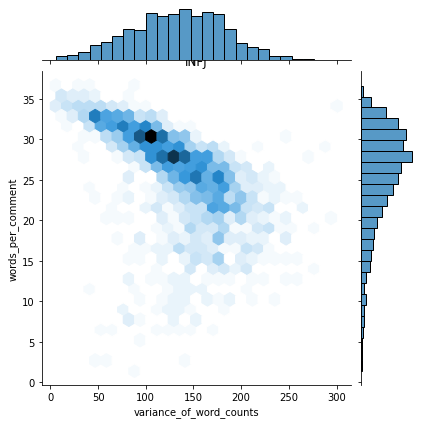

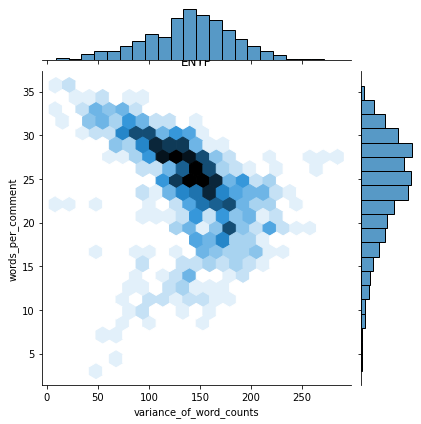

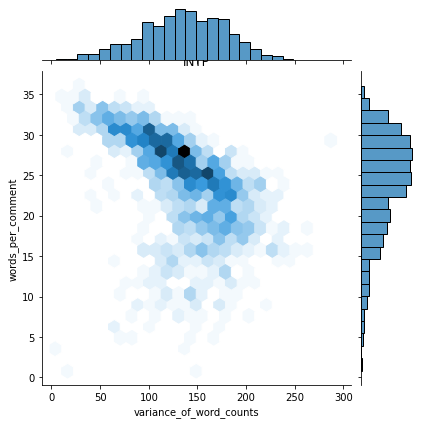

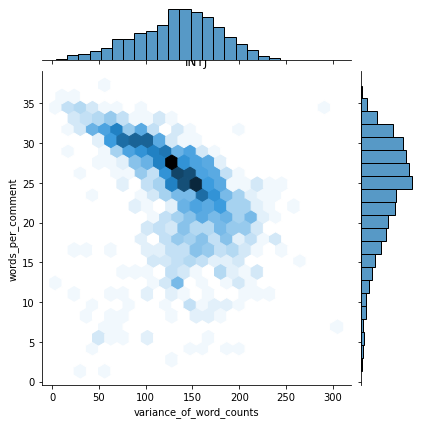

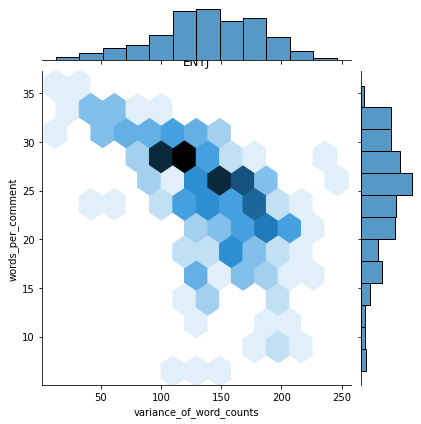

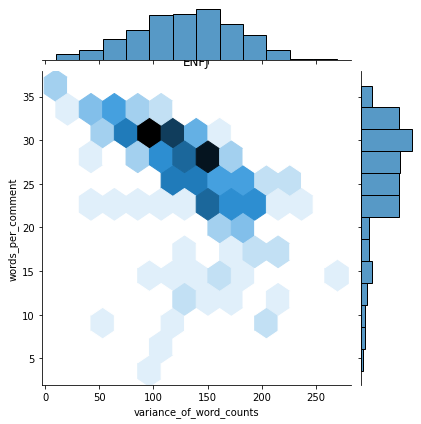

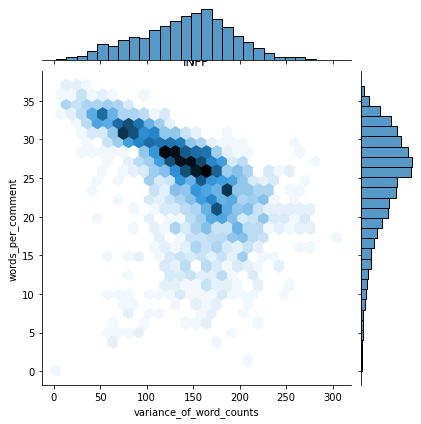

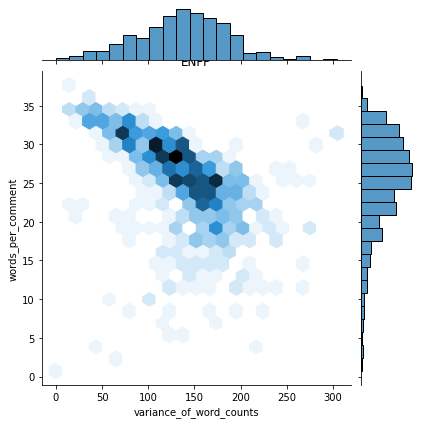

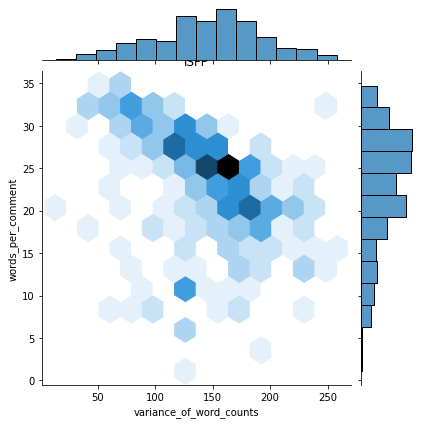

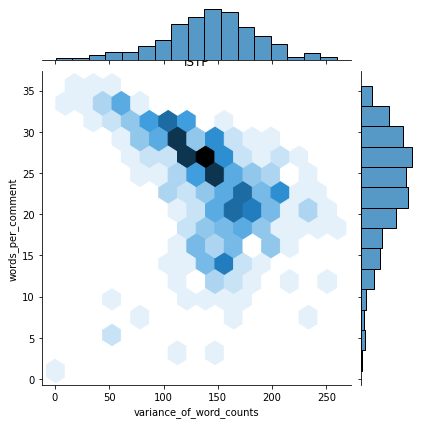

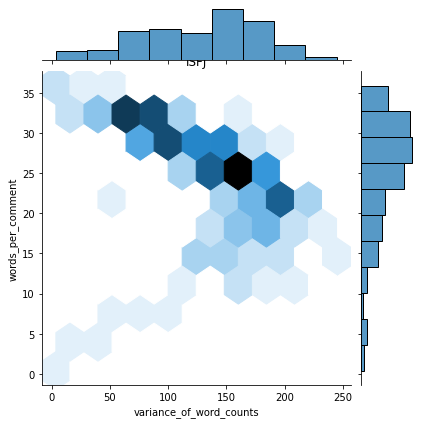

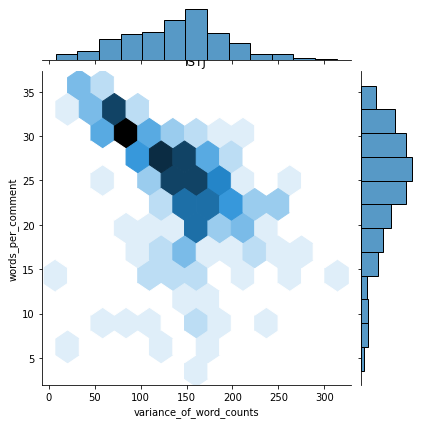

In [10]:
def plot_jointplot(mbti_type, axs, titles):
    train2 = train1[train1['type'] == mbti_type]
    sns.jointplot("variance_of_word_counts", "words_per_comment", data=train2, kind="hex", ax = axs, title = titles)
    
i = train1['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        train2 = train1[train1['type'] == i[k]]
        sns.jointplot("variance_of_word_counts", "words_per_comment", data=train2, kind="hex")
        plt.title(i[k])
        k+=1

# Processing

In [11]:
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [12]:
from sklearn.preprocessing import LabelEncoder

unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)

In [13]:
# Lemmatizer | Stemmatizer
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")


In [14]:
OnePost = train.posts[2]
OnePost

"'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there.    And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in the last 3

In [15]:
# One post
OnePost = train.posts[2]

# List all urls
urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', OnePost)

# Remove urls
temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'link', OnePost)

# Keep only words
temp = re.sub("[^a-zA-Z]", " ", temp)

# Remove spaces > 1
temp = re.sub(' +', ' ', temp).lower()

# Remove stopwords and lematize
%time stemmer.stem(" ".join([w for w in temp.split(' ') if w not in cachedStopWords]))

print("\nBefore preprocessing:\n\n", OnePost[0:500])
print("\nAfter preprocessing:\n\n", temp[0:500])
print("\nList of urls:")
urls

CPU times: user 1.43 ms, sys: 0 ns, total: 1.43 ms
Wall time: 1.44 ms

Before preprocessing:

 'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own t

After preprocessing:

  good one link of course to which i say i know that s my blessing and my curse does being absolutely positive that you and your best friend could be an amazing couple count if so than yes or it s more i could be madly in love in case i reconciled my feelings which at no i didn t thank you for a link so called ti si loop and it can stem from any current topic obsession can be de

['https://www.youtube.com/watch?v=fHiGbolFFGw',
 'https://www.tumblr.com/blog/-alexxxandra-',
 'http://-alexxxandra-.tumblr.com/',
 'http://www.youtube.com/watch?v=2Nkcn8m9M0M',
 "http://www.youtube.com/watch?v=7ghqoYxmaUE'"]

#  Preprocessing comments
1. Replace urls with a dummy word: "link"
2. Keep only words and put everything lowercase
3. Lemmatize each word

In [16]:
##### Compute list of subject with Type | list of comments 
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

def pre_process_data(data, remove_stop_words=True):

    list_personality = []
    list_posts = []
    len_data = len(data)
    i=0
    
    for row in data.iterrows():
        i+=1
        if i % 500 == 0:
            print("%s | %s rows" % (i, len_data))

        ##### Remove and clean comments
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'link', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])

        type_labelized = lab_encoder.transform([row[1].type])[0]
        list_personality.append(type_labelized)
        list_posts.append(temp)

    #del data
    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

list_posts, list_personality = pre_process_data(train, remove_stop_words=True)


500 | 8675 rows
1000 | 8675 rows
1500 | 8675 rows
2000 | 8675 rows
2500 | 8675 rows
3000 | 8675 rows
3500 | 8675 rows
4000 | 8675 rows
4500 | 8675 rows
5000 | 8675 rows
5500 | 8675 rows
6000 | 8675 rows
6500 | 8675 rows
7000 | 8675 rows
7500 | 8675 rows
8000 | 8675 rows
8500 | 8675 rows


* Vectorize with count and tf-idf
* keeping the words appearing in 10 to 50% of the posts.

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

cntizer = CountVectorizer(analyzer="word", 
                             max_features=1500, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,  
#                             ngram_range=(1,1),
                             max_df=0.5,
                             min_df=0.1) 
                                 
tfizer = TfidfTransformer()

print("CountVectorizer")
X_cnt = cntizer.fit_transform(list_posts)
print("Tf-idf")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

CountVectorizer
Tf-idf


In [18]:
list_posts[8674]

' long since personalitycafe although seem changed one bit must say good back somewhere like usually turn doctor link overwhelmed world around one dream chased large shadowy creature someone else felt save else dream ended reached safety happened well avatar doctor clockwork creature always liked monster worker trying job kind st thanks reply appreciate help get nd think everyone right opinion however many people abuse right p yea iron man thing xd thanks advice everyone thanks think needed humour might show maybe know anything harsh like throw beat although place go really really know judge personality type say mum introverted dad extroverted p ok understand want feel liking men good problem tell parent want tell really know say contempt always suppose spent afternoon buried book world spending morning animal suppose good mix whats hardest thing going face life got clue current perspective telling parent gay seems like huge hurdle suspect seem mi torchwood oh fictional oh well still g

*Count the top 50 words of the count vectorizer*

In [19]:
reverse_dic = {}
for key in cntizer.vocabulary_:
    reverse_dic[cntizer.vocabulary_[key]] = key
top_50 = np.asarray(np.argsort(np.sum(X_cnt, axis=0))[0,-50:][0, ::-1]).flatten()
[reverse_dic[v] for v in top_50]

['infp',
 'infj',
 'intj',
 'intp',
 'relationship',
 'lol',
 'enfp',
 'yeah',
 'thanks',
 'oh',
 'bit',
 'may',
 'entp',
 'agree',
 'quite',
 'guess',
 'talk',
 'school',
 'great',
 'thank',
 'personality',
 'use',
 'function',
 'bad',
 'everything',
 'interesting',
 'believe',
 'definitely',
 'happy',
 'reason',
 'part',
 'used',
 'often',
 'seem',
 'experience',
 'last',
 'word',
 'anyone',
 'test',
 'keep',
 'hate',
 'another',
 'girl',
 'forum',
 'enough',
 'put',
 'else',
 'care',
 'talking',
 'getting']

Lets try dimensionality reduction:

In [20]:
from sklearn.decomposition import TruncatedSVD
# Truncated SVD
svd = TruncatedSVD(n_components=12, n_iter=7, random_state=42)
svd_vec = svd.fit_transform(X_tfidf)

print("TSNE")
X_tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=650).fit_transform(svd_vec)

TSNE
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8675 samples in 0.032s...
[t-SNE] Computed neighbors for 8675 samples in 2.130s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8675
[t-SNE] Computed conditional probabilities for sample 2000 / 8675
[t-SNE] Computed conditional probabilities for sample 3000 / 8675
[t-SNE] Computed conditional probabilities for sample 4000 / 8675
[t-SNE] Computed conditional probabilities for sample 5000 / 8675
[t-SNE] Computed conditional probabilities for sample 6000 / 8675
[t-SNE] Computed conditional probabilities for sample 7000 / 8675
[t-SNE] Computed conditional probabilities for sample 8000 / 8675
[t-SNE] Computed conditional probabilities for sample 8675 / 8675
[t-SNE] Mean sigma: 0.065712
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.853966
[t-SNE] KL divergence after 650 iterations: 1.984970


# Plot tsne for each pair of letter:
* Extraversion (E) - Introversion (I)
* Sensation (S) - INtuition (N)
* Thinking (T) - Feeling (F)
* Judgement (J) - Perception (P)

In [21]:
# Split mbti personality into 4 letters and binarize
titles = ["Extraversion (E) - Introversion (I)",
          "Sensation (S) - INtuition (N)",
          "Thinking (T) - Feeling (F)",
          "Judgement (J) - Perception (P)"
         ] 
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    '''
    transform mbti to binary vector
    '''
    return [b_Pers[l] for l in personality]

def translate_back(personality):
    '''
    transform binary vector to mbti personality
    '''
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in train.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

# Plot
def plot_tsne(X, i):
    a = plt.figure(i, figsize=(30,20))
    plt.title(titles[i])
    plt.subplot(3,1,1)
    plt.scatter(X[:,0], X[:,1], c=list_personality_bin[:,i], cmap=plt.get_cmap('Dark2'), s=25)
    plt.legend(loc="upper left")
    plt.subplot(3,1,2)
    plt.scatter(X[:,0], X[:,2], c=list_personality_bin[:,i], cmap=plt.get_cmap('Dark2'), s=25)
    plt.subplot(3,1,3)
    plt.scatter(X[:,1], X[:,2], c=list_personality_bin[:,i], cmap=plt.get_cmap('Dark2'), s=25)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 ...
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 1]]


> Extraversion (E) - Introversion (I)

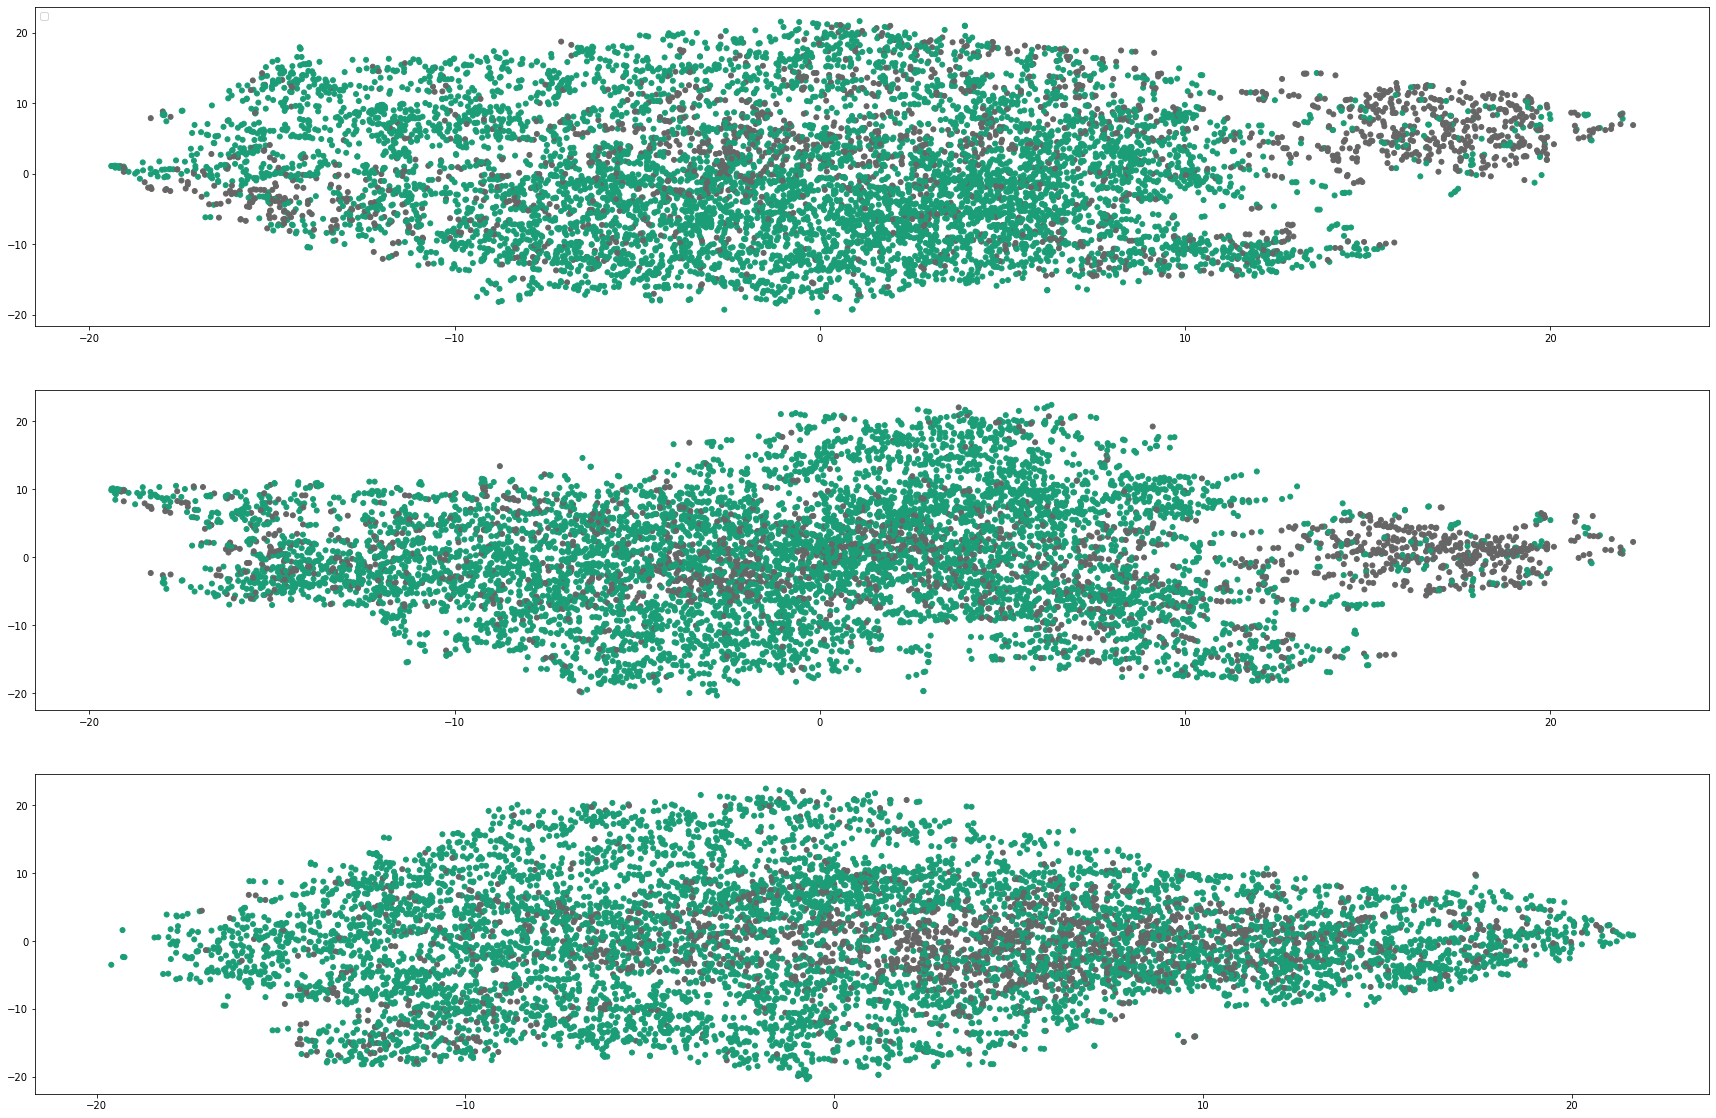

In [22]:
plot_tsne(X_tsne, 0)


Sensation (S) - INtuition (N)

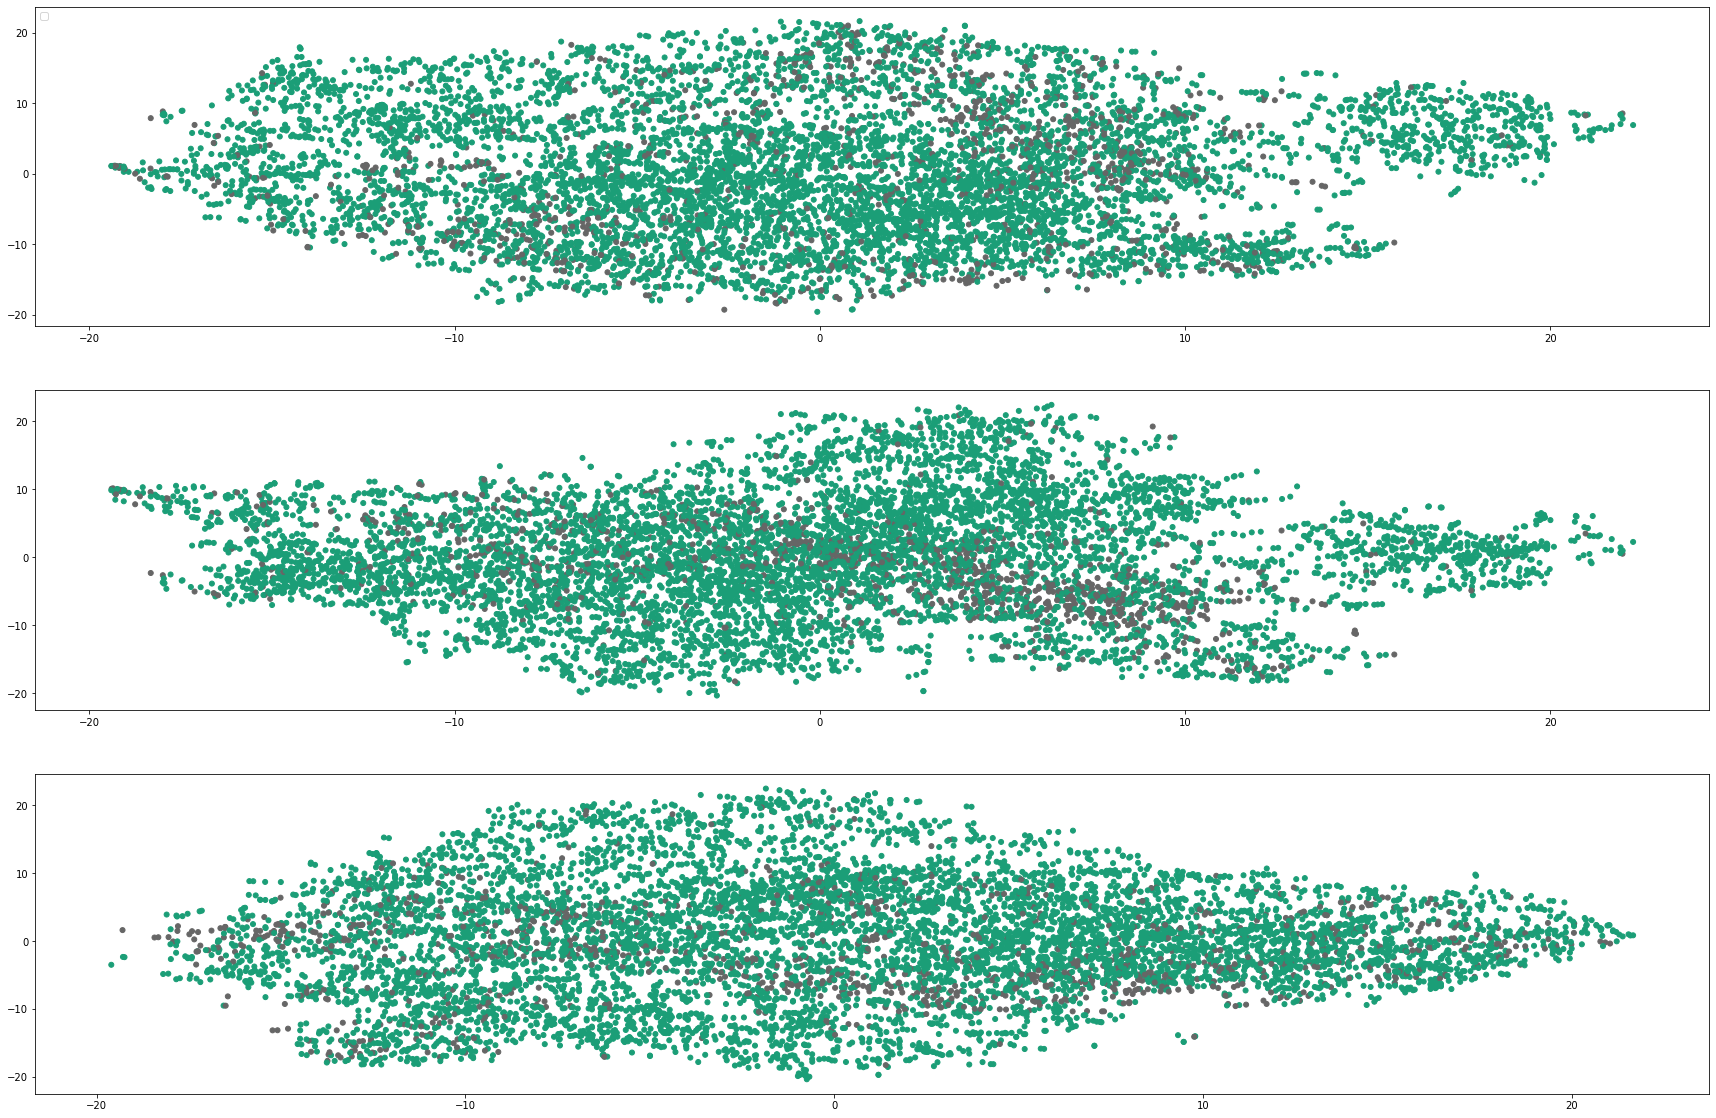

In [23]:
plot_tsne(X_tsne, 1)

Thinking (T) - Feeling (F)

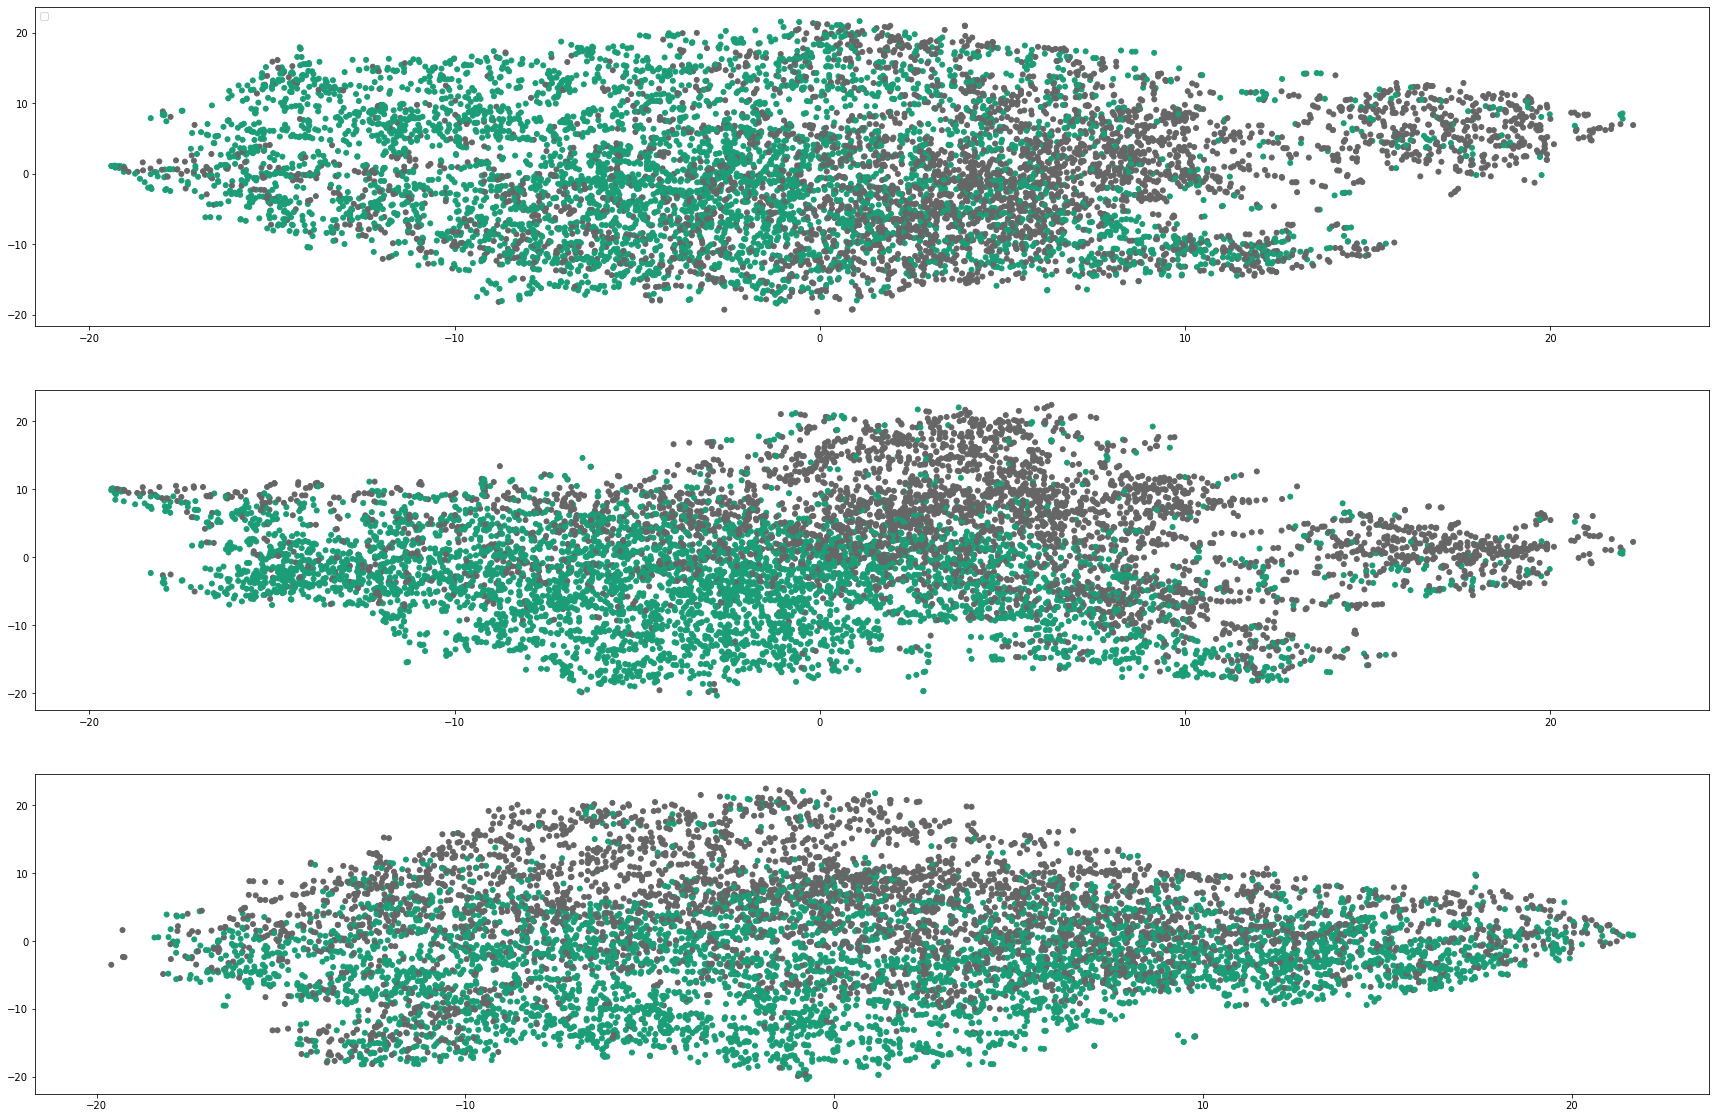

In [24]:
plot_tsne(X_tsne, 2)

Judgement (J) - Perception (P)

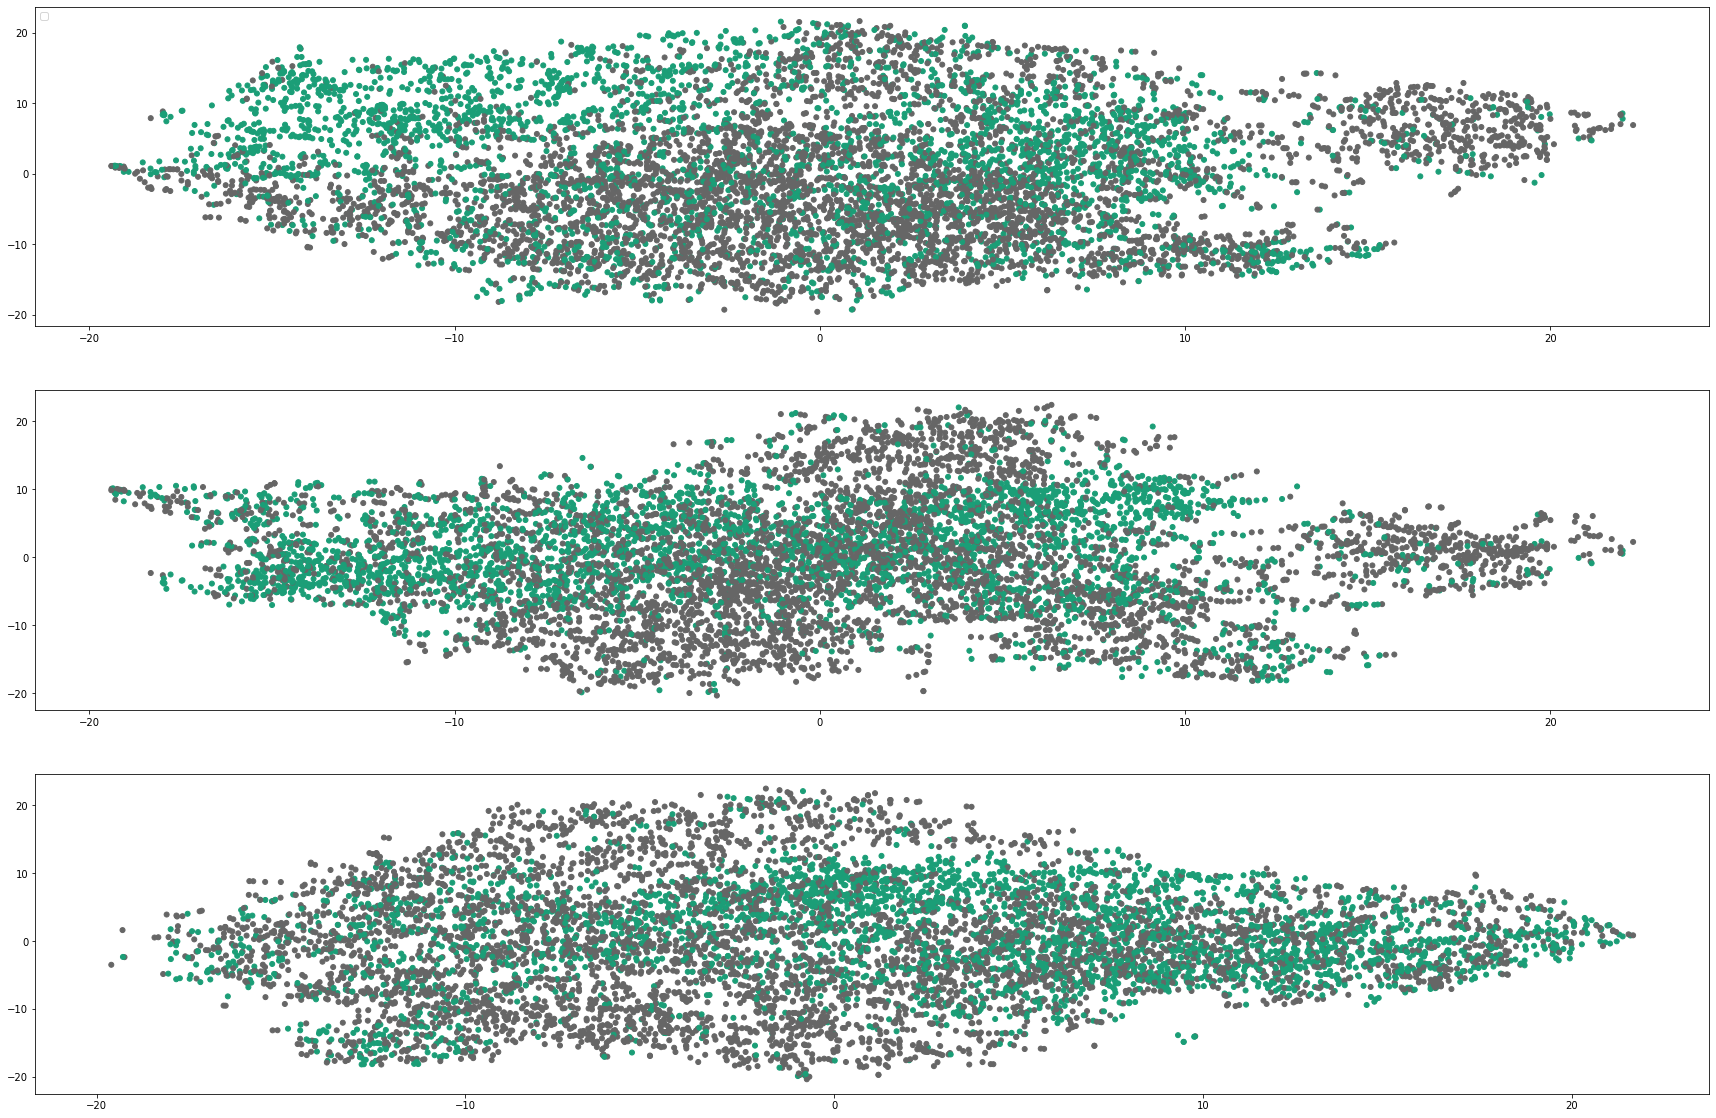

In [25]:
plot_tsne(X_tsne, 3)

In [26]:
# Confusion plot
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
##### Sklearn classifiers

from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC, NuSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

import xgboost as xgb
import pickle

# Vectorizer

cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,   
                             max_df=0.5,
                             min_df=0.1) 

tfizer = TfidfTransformer()

# Classifiers
PassAgg = PassiveAggressiveClassifier(max_iter=50)

sgd = SGDClassifier(loss='hinge',   
              penalty='l1',   
              alpha=1e-2,     
              random_state=42,
              max_iter=7,     
              tol=None)

# SVM
lsvc = LinearSVC()

# Multinomial Naive Bayes
mlNB = MultinomialNB()

# Xgboost 
# setup parameters for xgboost
param = {}

# use softmax multi-class classification
param['objective'] = 'multi:softprob'
# scale weight of positive examples
param['eta'] = 0.6
param['ntrees'] = 300
param['subsample'] = 0.93
param['max_depth'] = 2
param['silent'] = 1
param['n_jobs'] = 8
param['num_class'] = len(unique_type_list)
xgb_class = xgb.XGBClassifier(**param)


**Function to clear data**

In [28]:
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in tqdm(data.posts):
        sentence=sentence.lower()
        
#         removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    
#         removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)
    
        
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

In [29]:
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE

In [30]:
train_data,test_data=train_test_split(train,test_size=0.2,random_state=42,stratify=train.type)

In [31]:
train_data.posts,train_length=clear_text(train_data)


100%|██████████| 6940/6940 [00:06<00:00, 1002.12it/s]
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Tokenizing words

In [32]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [33]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:484: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.



TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x7feca26adf90>)

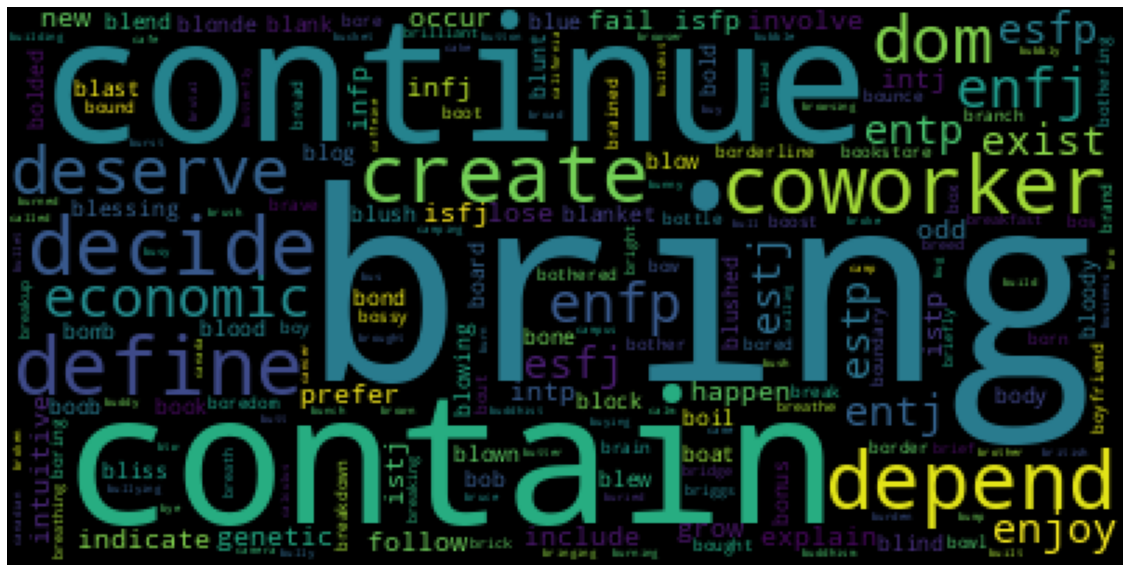

In [34]:
feature_names=vectorizer.get_feature_names()
wc=WordCloud(max_words=400)
wc.generate(' '.join(word for word in feature_names[500:3500] ))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)

In [35]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [36]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

# Model selection

In [37]:
models_accuracy={}


# Logistic Regression

In [38]:
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(train_post,train_target)

LogisticRegression(C=0.5, max_iter=3000, n_jobs=-1)

In [39]:
print('train classification report \n ',classification_report(train_target,model_log.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.86      0.16      0.27       152
        ENFP       0.81      0.65      0.72       540
        ENTJ       0.93      0.29      0.44       185
        ENTP       0.82      0.66      0.73       548
        ESFJ       0.00      0.00      0.00        34
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       1.00      0.04      0.08        71
        INFJ       0.73      0.83      0.78      1176
        INFP       0.66      0.93      0.77      1465
        INTJ       0.73      0.80      0.77       873
        INTP       0.69      0.87      0.77      1043
        ISFJ       0.89      0.24      0.38       133
        ISFP       0.86      0.26      0.40       217
        ISTJ       0.86      0.27      0.41       164
        ISTP       0.86      0.52      0.65       270

    accuracy                           0.72      

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [40]:
print('test classification report \n',classification_report(test_target,model_log.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
               precision    recall  f1-score   support

        ENFJ       1.00      0.03      0.05        38
        ENFP       0.74      0.41      0.53       135
        ENTJ       1.00      0.04      0.08        46
        ENTP       0.65      0.37      0.47       137
        ESFJ       0.00      0.00      0.00         8
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.62      0.60      0.61       294
        INFP       0.47      0.89      0.61       367
        INTJ       0.61      0.57      0.59       218
        INTP       0.56      0.75      0.64       261
        ISFJ       0.67      0.06      0.11        33
        ISFP       0.62      0.09      0.16        54
        ISTJ       0.33      0.02      0.05        41
        ISTP       0.62      0.22      0.33        67

    accuracy                           0.55      17

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [41]:
models_accuracy['logistic regression']=accuracy_score(test_target,model_log.predict(test_post))

# XGBoost Classifier

In [42]:
model_xgb=XGBClassifier(gpu_id=0,tree_method='gpu_hist',max_depth=5,n_estimators=50,learning_rate=0.1)
model_xgb.fit(train_post,train_target)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:57:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=2,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [43]:
print('train classification report \n ',classification_report(train_target,model_xgb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_xgb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.99      0.92      0.95       152
        ENFP       0.94      0.91      0.92       540
        ENTJ       0.99      0.90      0.94       185
        ENTP       0.94      0.91      0.92       548
        ESFJ       1.00      0.91      0.95        34
        ESFP       1.00      0.92      0.96        38
        ESTJ       1.00      0.84      0.91        31
        ESTP       1.00      0.94      0.97        71
        INFJ       0.91      0.90      0.91      1176
        INFP       0.89      0.95      0.92      1465
        INTJ       0.92      0.92      0.92       873
        INTP       0.90      0.93      0.91      1043
        ISFJ       1.00      0.96      0.98       133
        ISFP       0.99      0.92      0.95       217
        ISTJ       0.99      0.92      0.95       164
        ISTP       0.97      0.96      0.96       270

    accuracy                           0.92      

In [44]:
models_accuracy['XGBoost Classifier']=accuracy_score(test_target,model_xgb.predict(test_post))

# Catboost

In [45]:
model_cat=CatBoostClassifier(loss_function='MultiClass',eval_metric='MultiClass',task_type='GPU',verbose=False)
model_cat.fit(train_post,train_target)

In [46]:
print('train classification report \n ',classification_report(train_target,model_cat.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_cat.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.87      0.54      0.67       152
        ENFP       0.81      0.75      0.78       540
        ENTJ       0.89      0.59      0.71       185
        ENTP       0.78      0.78      0.78       548
        ESFJ       0.93      0.41      0.57        34
        ESFP       1.00      0.24      0.38        38
        ESTJ       1.00      0.35      0.52        31
        ESTP       0.93      0.56      0.70        71
        INFJ       0.79      0.82      0.81      1176
        INFP       0.77      0.88      0.82      1465
        INTJ       0.80      0.81      0.81       873
        INTP       0.75      0.86      0.80      1043
        ISFJ       0.88      0.63      0.73       133
        ISFP       0.80      0.64      0.71       217
        ISTJ       0.87      0.66      0.75       164
        ISTP       0.88      0.75      0.81       270

    accuracy                           0.79      

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [47]:
models_accuracy['CatBoost Classifier']=accuracy_score(test_target,model_cat.predict(test_post))

# Random Forest Classifier

In [48]:
model_forest=RandomForestClassifier(max_depth=10)
model_forest.fit(train_post,train_target)

RandomForestClassifier(max_depth=10)

In [49]:
print('train classification report \n ',classification_report(train_target,model_forest.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_forest.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.01      0.01       152
        ENFP       1.00      0.33      0.50       540
        ENTJ       1.00      0.05      0.09       185
        ENTP       0.97      0.56      0.71       548
        ESFJ       0.00      0.00      0.00        34
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.00      0.00      0.00        71
        INFJ       0.79      0.84      0.82      1176
        INFP       0.46      0.99      0.62      1465
        INTJ       0.88      0.76      0.81       873
        INTP       0.80      0.89      0.84      1043
        ISFJ       1.00      0.03      0.06       133
        ISFP       1.00      0.04      0.07       217
        ISTJ       1.00      0.09      0.16       164
        ISTP       1.00      0.19      0.32       270

    accuracy                           0.66      

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [50]:
models_accuracy['Random Forest Classifier']=accuracy_score(test_target,model_forest.predict(test_post))

# Multinomial Naive Bayes

In [51]:
model_multinomial_nb=MultinomialNB()
model_multinomial_nb.fit(train_post,train_target)

MultinomialNB()

In [52]:
print('train classification report \n ',classification_report(train_target,model_multinomial_nb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_multinomial_nb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       152
        ENFP       0.90      0.02      0.03       540
        ENTJ       0.00      0.00      0.00       185
        ENTP       0.91      0.06      0.11       548
        ESFJ       0.00      0.00      0.00        34
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.00      0.00      0.00        71
        INFJ       0.52      0.62      0.56      1176
        INFP       0.35      0.94      0.52      1465
        INTJ       0.78      0.42      0.54       873
        INTP       0.58      0.64      0.61      1043
        ISFJ       0.00      0.00      0.00       133
        ISFP       0.00      0.00      0.00       217
        ISTJ       0.00      0.00      0.00       164
        ISTP       1.00      0.00      0.01       270

    accuracy                           0.46      

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [53]:
models_accuracy['Multinomial Naive Bayes']=accuracy_score(test_target,model_multinomial_nb.predict(test_post))

# Support Vector classifier

In [54]:
model_svc=SVC()
model_svc.fit(train_post,train_target)

SVC()

In [55]:
print('train classification report \n ',classification_report(train_target,model_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.97      0.84      0.90       152
        ENFP       0.96      0.95      0.95       540
        ENTJ       0.99      0.90      0.94       185
        ENTP       0.95      0.96      0.95       548
        ESFJ       1.00      0.56      0.72        34
        ESFP       1.00      0.37      0.54        38
        ESTJ       1.00      0.52      0.68        31
        ESTP       1.00      0.82      0.90        71
        INFJ       0.95      0.97      0.96      1176
        INFP       0.92      0.98      0.95      1465
        INTJ       0.96      0.96      0.96       873
        INTP       0.94      0.97      0.96      1043
        ISFJ       1.00      0.89      0.94       133
        ISFP       0.97      0.90      0.94       217
        ISTJ       0.94      0.92      0.93       164
        ISTP       0.97      0.94      0.95       270

    accuracy                           0.95      

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [56]:
models_accuracy['Support Vector classifier']=accuracy_score(test_target,model_svc.predict(test_post))

# Accuracy Comparing

In [57]:
models_accuracy

{'logistic regression': 0.5515850144092219,
 'XGBoost Classifier': 0.6172910662824207,
 'CatBoost Classifier': 0.622478386167147,
 'Random Forest Classifier': 0.43054755043227666,
 'Multinomial Naive Bayes': 0.33487031700288183,
 'Support Vector classifier': 0.5585014409221902}

In [58]:
accuarcy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])

In [59]:
accuarcy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')